In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np

# NLP libraries
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

# ML libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Visualization librations
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud libraries
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
import requests

[nltk_data] Downloading package punkt to /Users/tracyqiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tracyqiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
# lemmatizer
lm = WordNetLemmatizer()

# Checks if given word contains a special character
def contains_special(word):
    for char in word:
        if char.isnumeric() or (not char.isalnum()):
            return True
    return False

# process sentences
def process_sentences(sentence):
    # tokenize, lemmatize, and remove special characters
    processed = [lm.lemmatize(word.lower()) for word in nltk.word_tokenize(sentence)
          # make sure no strings that contain only numeric characters
          if not contains_special(word)]
    return ' '.join(processed)

In [52]:
# get data
df = pd.read_csv('tweets.csv')
# drop duplicates
df.drop_duplicates(inplace =True)

In [53]:
df['target'].value_counts()

target
0    9256
1    2114
Name: count, dtype: int64

In [54]:
# text pre-processing
df["text"] = df["text"].apply(process_sentences)

# Convert text data into BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
vocabulary = vectorizer.vocabulary_
print('Vocab size: ' + str(len(vocabulary)))

Vocab size: 16985


In [55]:
comment_words = '' 
stopwords = set(STOPWORDS)

for val in vocabulary: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [56]:
stopwords = set(STOPWORDS)

pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words)

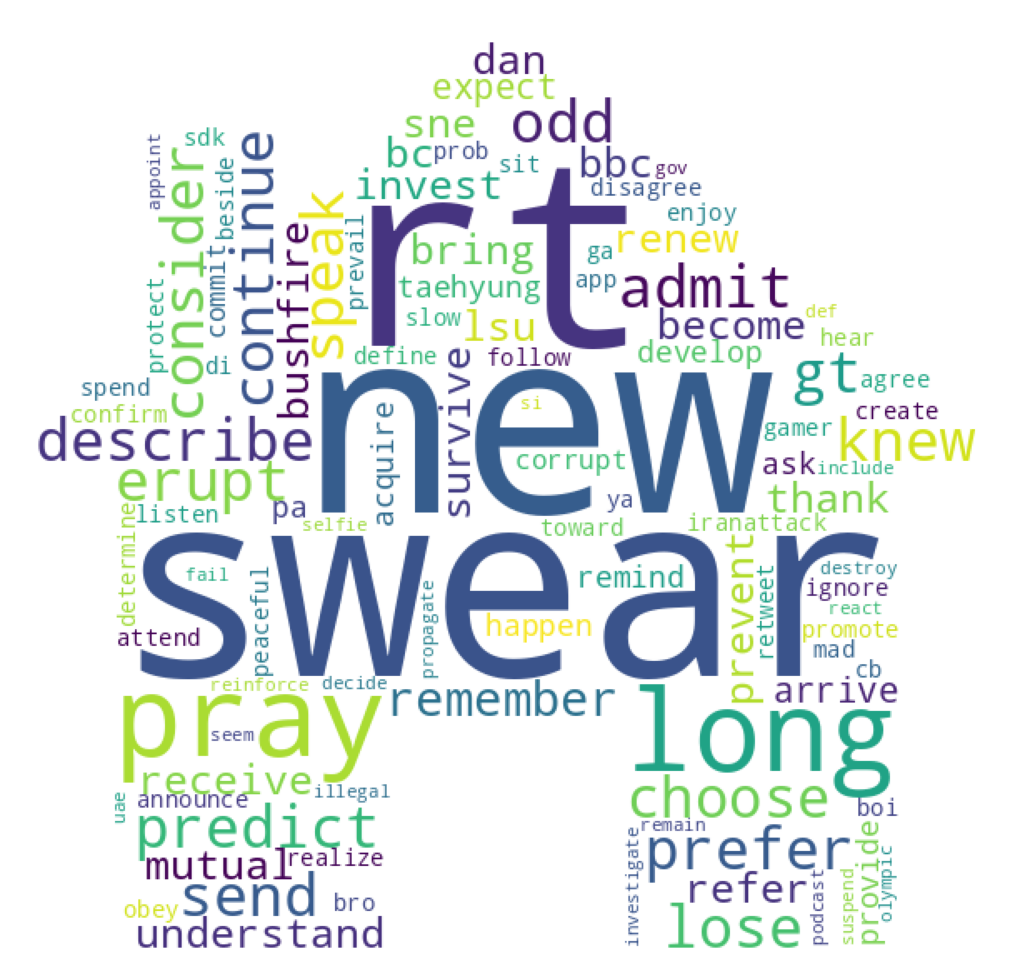

In [57]:
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [58]:
print(df["text"][0])
for f in X[0]:
  print(f)

communal violence in bhainsa telangana stone were pelted on muslim house and some house and vehicle were set
  (0, 2923)	1
  (0, 16126)	1
  (0, 7262)	1
  (0, 1492)	1
  (0, 14891)	1
  (0, 14305)	1
  (0, 16381)	2
  (0, 11052)	1
  (0, 10544)	1
  (0, 9860)	1
  (0, 6955)	2
  (0, 580)	2
  (0, 13916)	1
  (0, 16005)	1
  (0, 13334)	1


In [59]:
vocabulary['house']

6955

In [60]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), df['target'], test_size=0.25, random_state=1)

In [61]:
# Naive Bayes
def naive_bayes(X_train, X_test, y_train, y_test):
    # increased max iter to prevent early time out
    clf = MultinomialNB().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test,
                                    y_pred))
    return y_pred

print('Naive Bayes\n')
ypred_nb = naive_bayes(X_train, X_test, y_train, y_test)

Naive Bayes

accuracy: 0.8695040450228632
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2321
           1       0.65      0.62      0.64       522

    accuracy                           0.87      2843
   macro avg       0.78      0.77      0.78      2843
weighted avg       0.87      0.87      0.87      2843



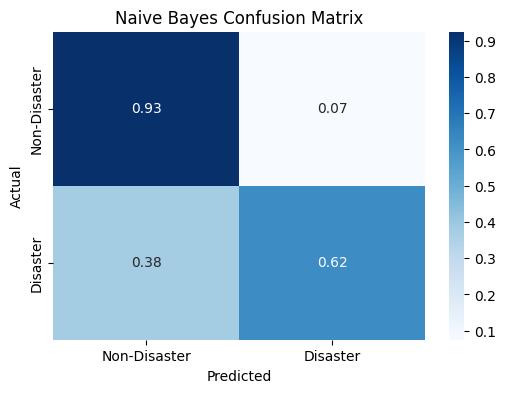

In [62]:
#Plot Naive Bayes confusion matrix
cf_matrix = confusion_matrix(y_test, ypred_nb)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


In [63]:
# Logistic Regression
def logistic_regression(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    # scale data to reduce ranges
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # increased max iter to prevent early time out
    clf = LogisticRegression(max_iter = 500).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test,
                                    y_pred))
    return y_pred

print('Logistic Regression\n')
ypred_lr = logistic_regression(X_train, X_test, y_train, y_test)

Logistic Regression

accuracy: 0.8712627506155469
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2321
           1       0.67      0.58      0.62       522

    accuracy                           0.87      2843
   macro avg       0.79      0.76      0.77      2843
weighted avg       0.87      0.87      0.87      2843



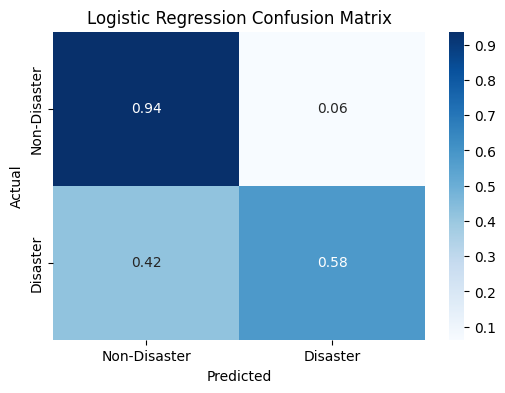

In [64]:
#Plot Logistic Regression confusion matrix
cf_matrix = confusion_matrix(y_test, ypred_lr)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()